In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json

In [ ]:
# Dataset taken from kaggle challenge.

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lucilerb","key":"2fa934319080c9e22416ed7245157bb0"}'}

In [ ]:
# Make directory named kaggle and copy kaggle.json file there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
# Change the permissions of the file
! chmod 600 /content/kaggle.json

In [ ]:
# Download dataset from Kaggle
! kaggle competitions download -c tensorflow2-question-answering

403 - Forbidden


In [ ]:
# Load dataset train
train = pd.read_csv('/content/train.csv')

In [ ]:
# EDA

In [ ]:
train.shape

(6036000, 8)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
 7   pressure   float64
dtypes: float64(3), int64(5)
memory usage: 368.4 MB


In [ ]:
train.head()

id  breath_id   R   C  time_step       u_in  u_out   pressure
0   1          1  20  50   0.000000   0.083334      0   5.837492
1   2          1  20  50   0.033652  18.383041      0   5.907794
2   3          1  20  50   0.067514  22.509278      0   7.876254
3   4          1  20  50   0.101542  22.808822      0  11.742872
4   5          1  20  50   0.135756  25.355850      0  12.234987

In [ ]:
train.describe()

id     breath_id             R             C     time_step  \
count  6.036000e+06  6.036000e+06  6.036000e+06  6.036000e+06  6.036000e+06   
mean   3.018000e+06  6.283886e+04  2.703618e+01  2.608072e+01  1.307225e+00   
std    1.742443e+06  3.633526e+04  1.959549e+01  1.715231e+01  7.659778e-01   
min    1.000000e+00  1.000000e+00  5.000000e+00  1.000000e+01  0.000000e+00   
25%    1.509001e+06  3.137700e+04  5.000000e+00  1.000000e+01  6.428995e-01   
50%    3.018000e+06  6.276550e+04  2.000000e+01  2.000000e+01  1.308123e+00   
75%    4.527000e+06  9.430100e+04  5.000000e+01  5.000000e+01  1.965502e+00   
max    6.036000e+06  1.257490e+05  5.000000e+01  5.000000e+01  2.937238e+00   

               u_in         u_out      pressure  
count  6.036000e+06  6.036000e+06  6.036000e+06  
mean   7.321615e+00  6.204493e-01  1.122041e+01  
std    1.343470e+01  4.852752e-01  8.109703e+00  
min    0.000000e+00  0.000000e+00 -1.895744e+00  
25%    3.936623e-01  0.000000e+00  6.329607e+00  
50%    4.386146e+00  1.000000e+00  7.032628e+00  
75%    4.983895e+00  1.000000e+00  1.364103e+01  
max    1.000000e+02  1.000000e+00  6.482099e+01

In [ ]:
train.corr()

id  breath_id         R         C  time_step      u_in  \
id         1.000000   0.999999  0.001853  0.007222  -0.000199 -0.002380   
breath_id  0.999999   1.000000  0.001860  0.007222  -0.000213 -0.002378   
R          0.001853   0.001860  1.000000 -0.096070  -0.014535 -0.148120   
C          0.007222   0.007222 -0.096070  1.000000   0.004936  0.151002   
time_step -0.000199  -0.000213 -0.014535  0.004936   1.000000 -0.352276   
u_in      -0.002380  -0.002378 -0.148120  0.151002  -0.352276  1.000000   
u_out     -0.000089  -0.000100 -0.007594  0.003720   0.839191 -0.416985   
pressure  -0.002402  -0.002394  0.015976 -0.036727  -0.524829  0.308136   

              u_out  pressure  
id        -0.000089 -0.002402  
breath_id -0.000100 -0.002394  
R         -0.007594  0.015976  
C          0.003720 -0.036727  
time_step  0.839191 -0.524829  
u_in      -0.416985  0.308136  
u_out      1.000000 -0.614910  
pressure  -0.614910  1.000000

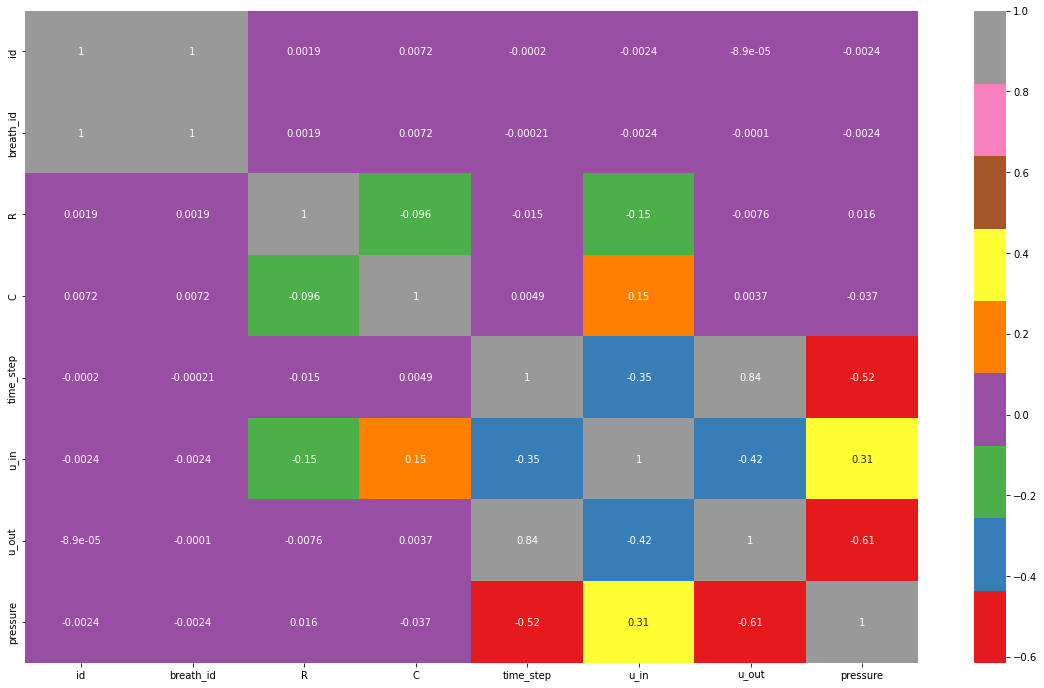

In [ ]:
# heatmap des correlations
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(), annot = True, cmap="Set1")
plt.show()

In [ ]:
train.columns

Index(['id', 'breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out', 'pressure'], dtype='object')

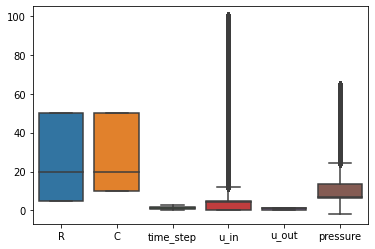

In [ ]:
# boxplot
plt.figure()
sns.boxplot(data = train.drop(['id', 'breath_id'], axis=1)) # pour enlever les colonnes id
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

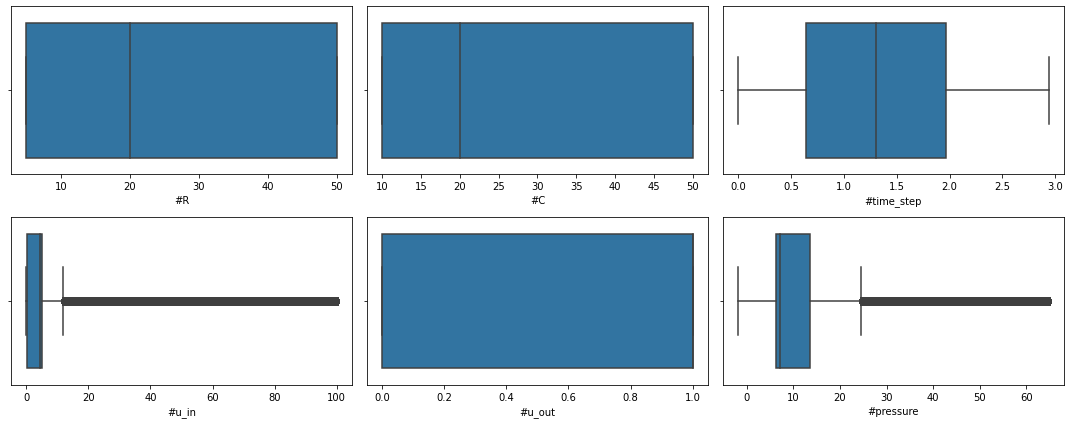

In [ ]:
# un peu moche - faire les boxplots sur subplots différents
data = train.drop(['id', 'breath_id'], axis=1)

i = 0
plt.figure(figsize=(15, 6))
for col in data.columns:
  plt.subplot(2, 3, 1 + i)
  sns.boxplot((data[col]))
  plt.xlabel(f'#{col}')
  i += 1
plt.tight_layout()
plt.show()

## colonne R ## 
lung attribute indicating how restricted the airway is
higher R being harder to blow
unit = cmH2O/L/S

In [ ]:
train['R'].unique()

array([20, 50,  5])

In [ ]:
train['R'].value_counts()

50    2410080
5     1988800
20    1637120
Name: R, dtype: int64

## colonne C ##
lung attribute indicating how compliant the lung is
higher C being easier to blow
unit = mL/cmH2O

In [ ]:
train['C'].unique()

array([50, 20, 10])

In [ ]:
train['C'].value_counts()

10    2244720
50    1971680
20    1819600
Name: C, dtype: int64

In [ ]:
# R C combinaison

In [ ]:
rc_values = np.array([[r, c, len(train[(train['R'] == r) & (train['C'] == c)])] for r in train['R'].unique() for c in train['C'].unique()])
rc_values

array([[     20,      50,  654880],
       [     20,      20,  496640],
       [     20,      10,  485600],
       [     50,      50,  655120],
       [     50,      20,  660800],
       [     50,      10, 1094160],
       [      5,      50,  661680],
       [      5,      20,  662160],
       [      5,      10,  664960]])

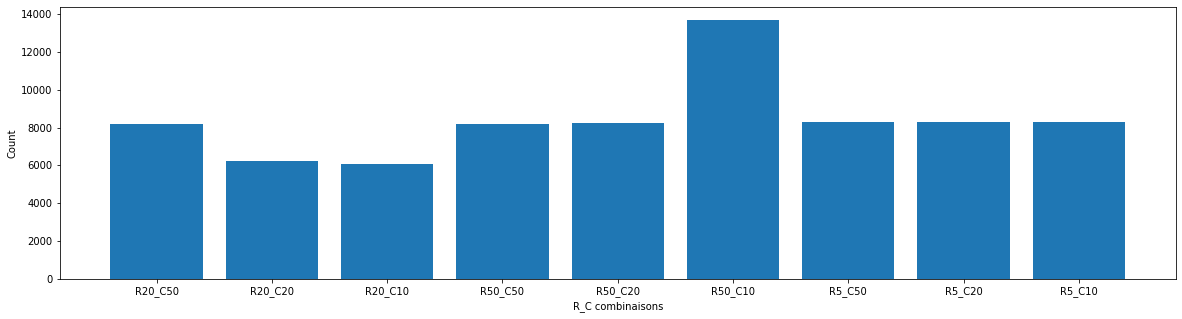

In [ ]:
# R_C combinaisons count (valeurs divisées par nombre de respirations)
x = range(len(rc_values))
plt.figure(figsize = (20,5))
plt.bar(x, rc_values[:,2]/80)
plt.xticks(x, ['R' + str(r) + '_' + 'C' + str(c) for r, c in rc_values[:,:2]])
plt.xlabel('R_C combinaisons')
plt.ylabel('Count')
plt.show()

## breath_id ##
globally-unique time step for breaths

In [ ]:
train['breath_id'].unique()

array([     1,      2,      3, ..., 125743, 125745, 125749])

In [ ]:
train['breath_id'].nunique()

75450

In [ ]:
train['breath_id'].value_counts()

1         80
83891     80
83924     80
83923     80
83922     80
          ..
41745     80
41743     80
41742     80
41741     80
125749    80
Name: breath_id, Length: 75450, dtype: int64

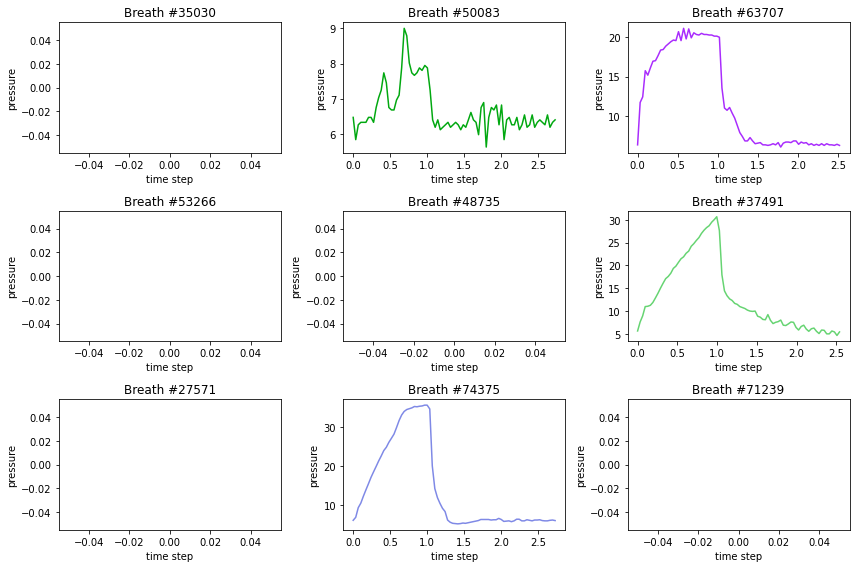

In [ ]:
# plot pression pour 9 respirations au hasard

plt.figure(figsize=(12, 8))

for i in range(1, 10):
    plt.subplot(int(f"33{i}"))
    x = int(np.random.randint(0,75450,1))
    plt.plot((train['time_step'][train['breath_id'] == x]), (train['pressure'][train['breath_id'] == x]), c=np.random.random(3))
    plt.title(f'Breath #{x}')
    plt.xlabel('time step')
    plt.ylabel('pressure')

plt.tight_layout() #pour que les subplots s'ajustent automatiquement et que les légendes ne s'overlappent pas
plt.show()

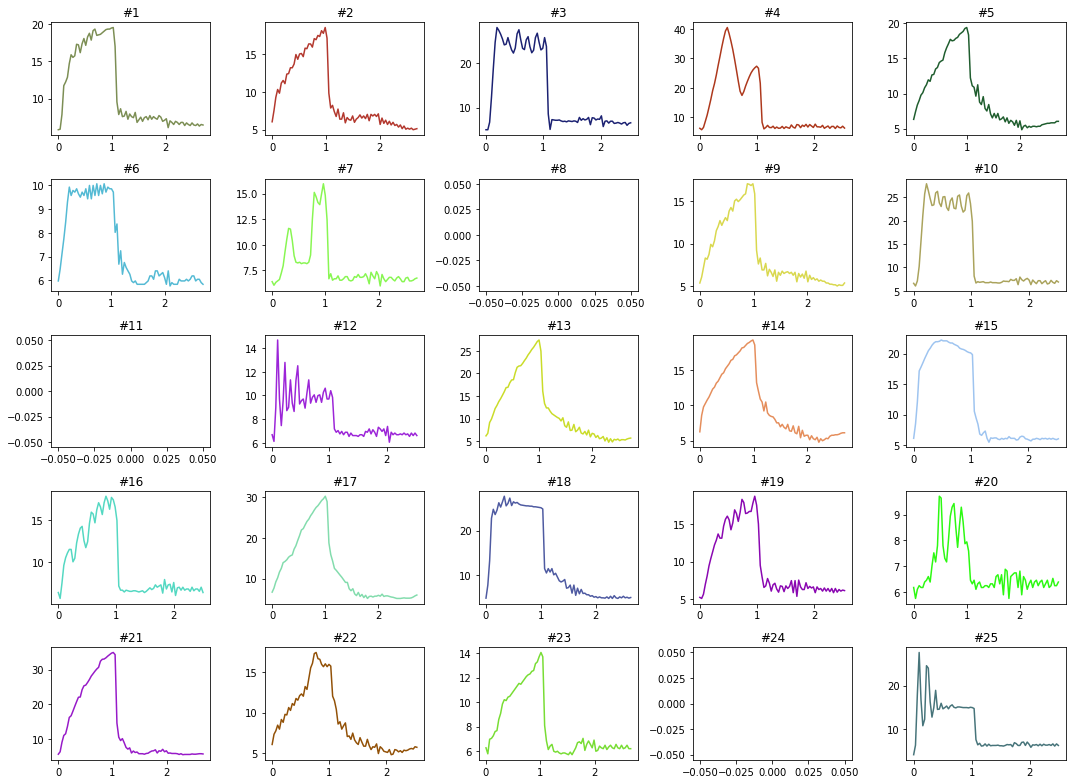

In [ ]:
# plot les 25 premières respirations

plt.figure(figsize=(15, 11))

x = 1
for i in range(0, 25):
    plt.subplot(5, 5, 1 + i)
    plt.plot((train['time_step'][train['breath_id'] == x]), (train['pressure'][train['breath_id'] == x]), c=np.random.random(3))
    plt.title(f'#{x}')
    x += 1

plt.tight_layout()
plt.show()

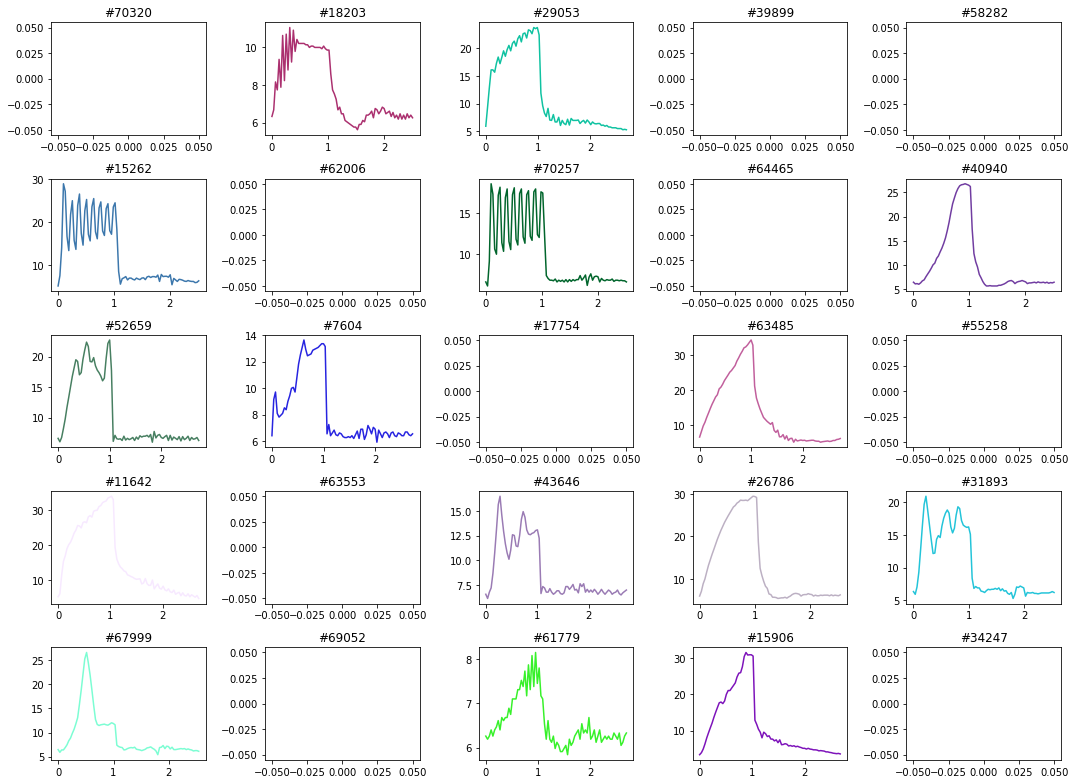

In [ ]:
# plot 25 respirations au hasard

plt.figure(figsize=(15, 11))

for i in range(0, 25):
    plt.subplot(5, 5, 1 + i)
    x = int(np.random.randint(0,75450,1))
    plt.plot((train['time_step'][train['breath_id'] == x]), (train['pressure'][train['breath_id'] == x]), c=np.random.random(3))
    plt.title(f'#{x}')

plt.tight_layout()
plt.show()

## time step ##
the actual time stamp

In [ ]:
train['time_step'].nunique()

3767571

time_step = float

In [ ]:
train['time_step'].value_counts()

0.000000    75450
0.031934       46
0.031935       44
0.031920       43
0.031938       43
            ...  
1.793088        1
1.827272        1
1.896594        1
1.930891        1
2.638017        1
Name: time_step, Length: 3767571, dtype: int64

In [ ]:
#pas les mêmes time steps pour chaque respiration

In [ ]:
# plus grande valeur de time_step
train['time_step'].iloc[-1] # donne la dernière valeur mais pas forcément la plus grande

2.638017416000366

In [ ]:
train['time_step'].max() #plus grande valeur

2.9372379779815674

In [ ]:
# lier time_step et breath_id
train.groupby('breath_id')['time_step']

In [ ]:
# durée de chaque respiration
train.groupby('breath_id')['time_step'].mean()

breath_id
1         1.344606
2         1.344371
3         1.262657
4         1.264007
5         1.362075
            ...   
125740    1.359689
125742    1.332208
125743    1.332587
125745    1.254346
125749    1.318740
Name: time_step, Length: 75450, dtype: float64

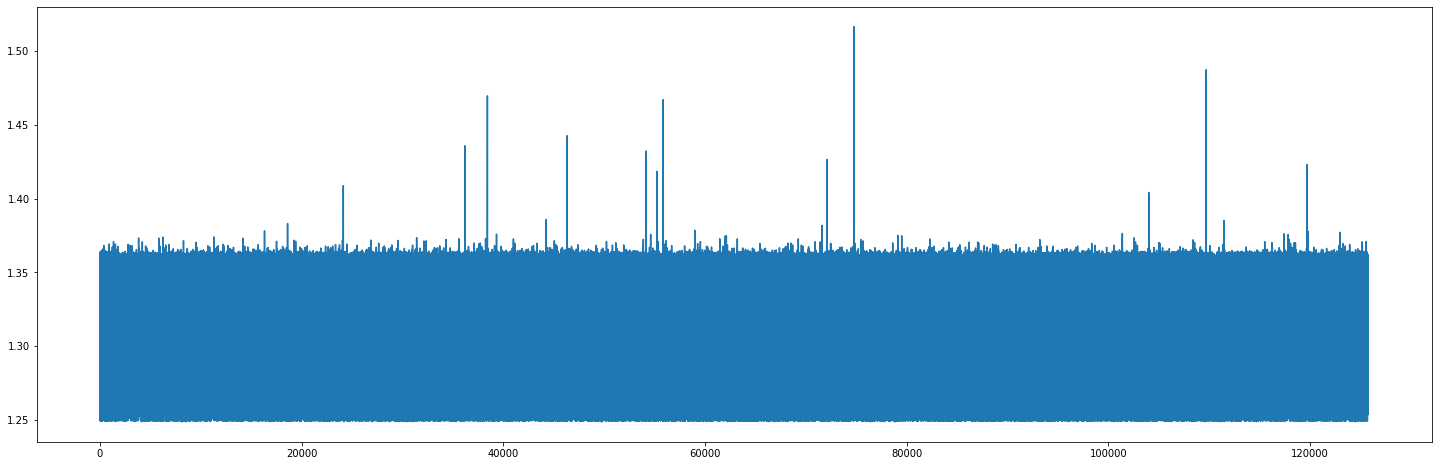

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(train.groupby('breath_id')['time_step'].mean())
plt.show()

In [ ]:
# nul, sert à rien

In [ ]:
train.groupby('breath_id')['time_step'].mean().sort_values()

breath_id
49772     1.248343
8126      1.248362
78837     1.248428
124459    1.248447
76411     1.248489
            ...   
46324     1.442626
55851     1.467093
38415     1.469664
109693    1.487416
74766     1.516630
Name: time_step, Length: 75450, dtype: float64

In [ ]:
train.groupby('breath_id')['time_step'].mean().max()

1.5166297405958176

In [ ]:
train.groupby('breath_id')['time_step'].mean().min()

1.2483434200286865

In [ ]:
# toutes les respirations ne sont pas équivalentes

## u_in ##
the control input for the inspiratory solenoid valve
Ranges from 0 to 100 - continuous variable

represents the percentage the inspiratory solenoid valve is open to let air into the lung (i.e., 0 is completely closed and no air is let in and 100 is completely open).

In [ ]:
train['u_in'].unique()

array([ 0.08333401, 18.38304147, 22.50927777, ...,  1.55897786,
        1.27266322,  1.48273915])

In [ ]:
train['u_in'].nunique()

4020300

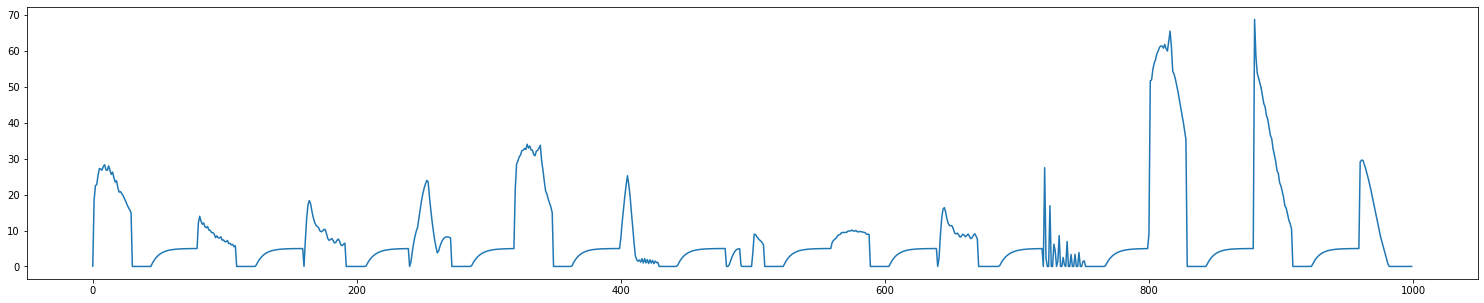

In [ ]:
plt.figure(figsize=(26, 5))
plt.plot(train['u_in'][0:1000])
plt.show()

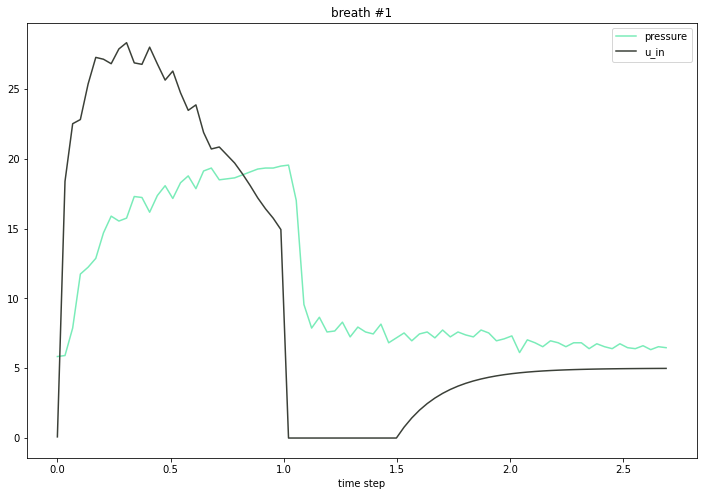

In [ ]:
# plot u_in et pressure
plt.figure(figsize=(12,8))

plt.plot(train['time_step'][train['breath_id'] == 1], train['pressure'][train['breath_id'] == 1], c=np.random.random(3), label='pressure')
plt.plot(train['time_step'][train['breath_id'] == 1], train['u_in'][train['breath_id'] == 1], c=np.random.random(3), label='u_in')
plt.title('breath #1')
plt.xlabel('time step')
plt.legend()

plt.show()

## u_out ##
the control input for the exploratory solenoid valve
binary variable (boolean)
exploratory valve is open (1) or closed (0)

In [ ]:
train['u_out'].unique()

array([0, 1])

In [ ]:
train['u_out'].value_counts()

1    3745032
0    2290968
Name: u_out, dtype: int64

## respiration ##

In [ ]:
train.columns

Index(['id', 'breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out', 'pressure'], dtype='object')

In [ ]:
features = ['R', 'C', 'u_in', 'u_out', 'pressure']

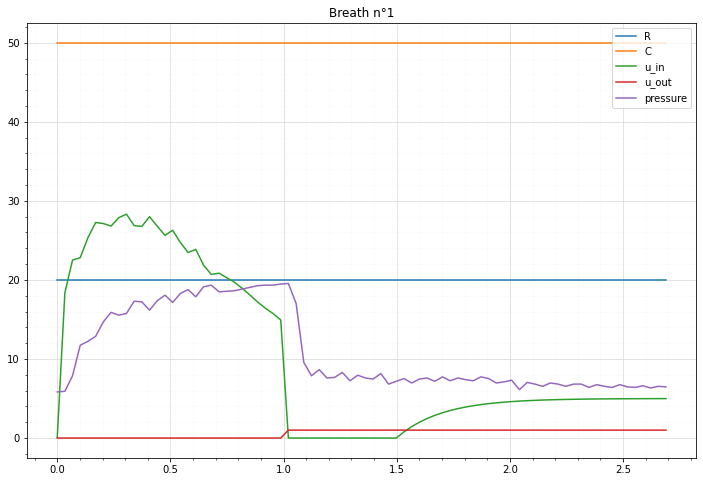

In [ ]:
# plot breath n°1
plt.figure(figsize=(12,8))
for i in features:
  plt.plot(train['time_step'][train['breath_id'] == 1], train[i][train['breath_id'] == 1], label=i)
plt.legend()
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.title('Breath n°1')
plt.show()

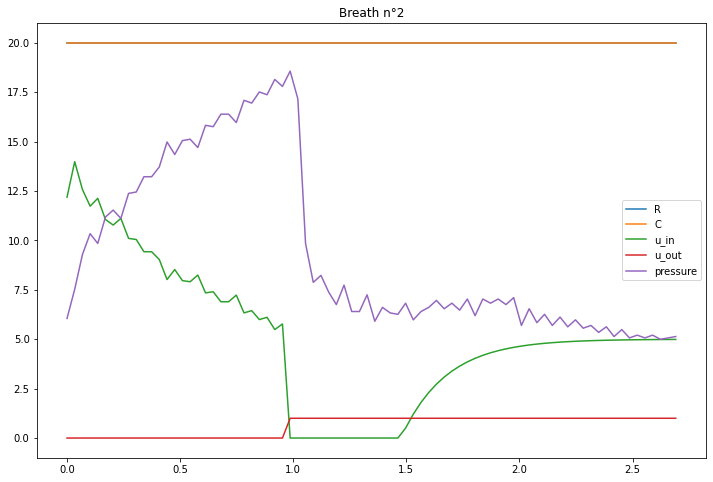

In [ ]:
# plot breath n°2
plt.figure(figsize=(12,8))
for i in features:
  plt.plot(train['time_step'][train['breath_id'] == 2], train[i][train['breath_id'] == 2], label=i)
plt.legend()
plt.title('Breath n°2')
plt.show()

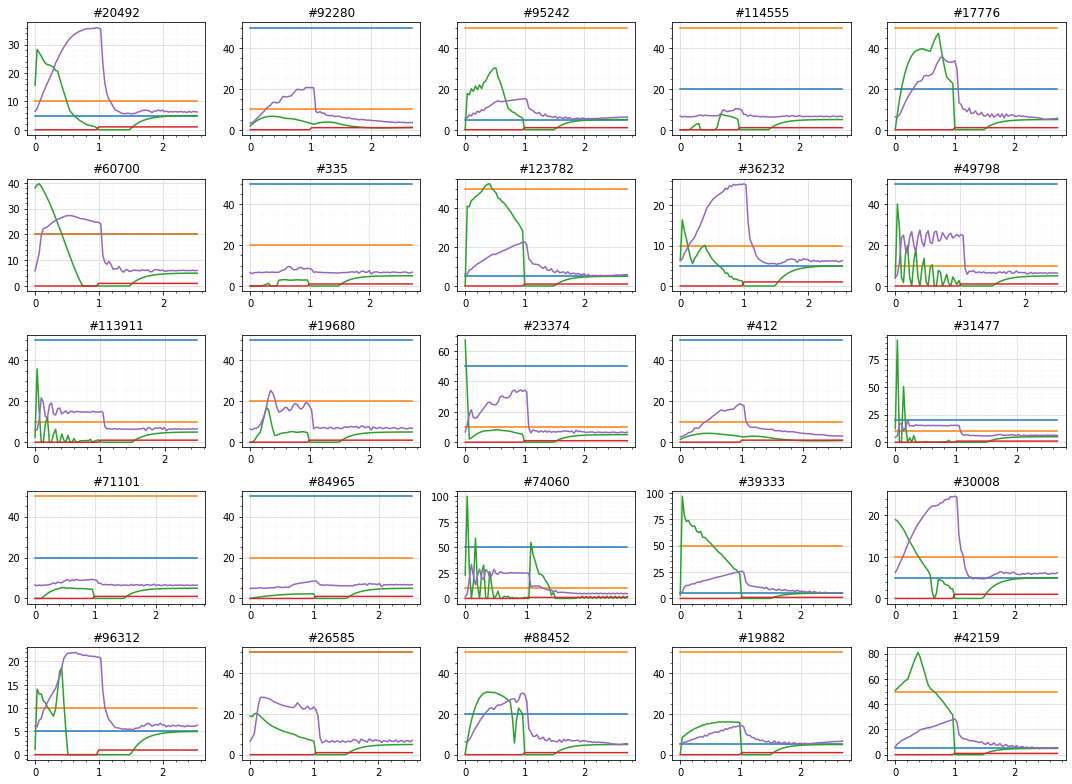

In [ ]:
plt.figure(figsize=(15, 11))

for i in range(0, 25):
    x = random.choice(train['breath_id'].unique())
    plt.subplot(5, 5, 1 + i)
    for y in features:
        plt.plot(train['time_step'][train['breath_id'] == x], train[y][train['breath_id'] == x], label=y)
    plt.title(f'#{x}')
    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
    plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    plt.minorticks_on()
    
plt.tight_layout()
plt.show()

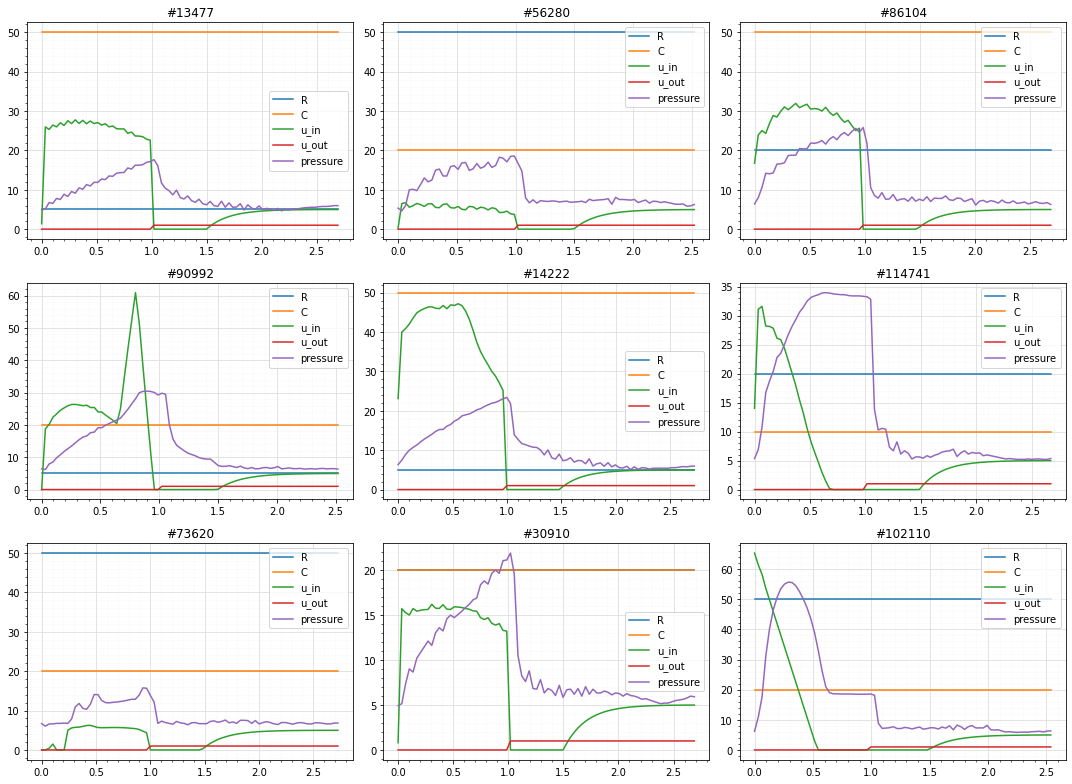

In [ ]:
plt.figure(figsize=(15, 11))

for i in range(1, 10):
    plt.subplot(3, 3, i)
    x = random.choice(train['breath_id'].unique())
    for y in features:
        plt.plot(train['time_step'][train['breath_id'] == x], train[y][train['breath_id'] == x], label=y)
    plt.title(f'#{x}')
    plt.legend()
    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
    plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    plt.minorticks_on()

plt.tight_layout()
plt.show()

In [ ]:
# même chose mais pour les poumons avec R = 20 et C = 50

In [ ]:
# on récupère les id des respi pour les poumons avec R20 et C50
breaths_r20c50 = train['breath_id'][(train['R'] == train['R'].unique()[0]) & (train['C'] == train['C'].unique()[0])].unique()
breaths_r20c50

array([     1,     19,     30, ..., 125685, 125717, 125722])

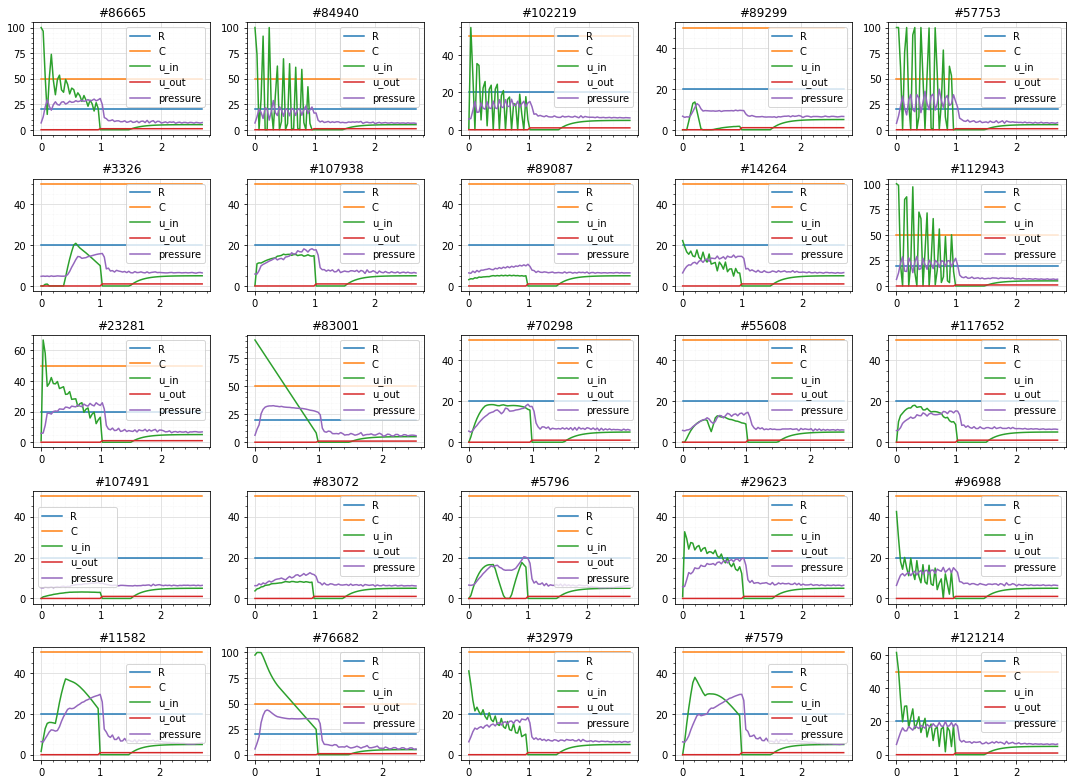

In [ ]:
plt.figure(figsize=(15, 11))

for i in range(0, 25):
    plt.subplot(5, 5, 1 + i)
    x = random.choice(breaths_r20c50)
    for y in features:
        plt.plot(train['time_step'][train['breath_id'] == x], train[y][train['breath_id'] == x], label=y)
    plt.title(f'#{x}')
    plt.legend()
    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
    plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    plt.minorticks_on()

plt.tight_layout()
plt.show()

In [ ]:
# idem avec les id des respi pour les poumons avec R20 et C20
breaths_r20c20 = train['breath_id'][(train['R'] == train['R'].unique()[0]) & (train['C'] == train['C'].unique()[1])].unique()
breaths_r20c20

array([     2,      9,     15, ..., 125667, 125692, 125702])

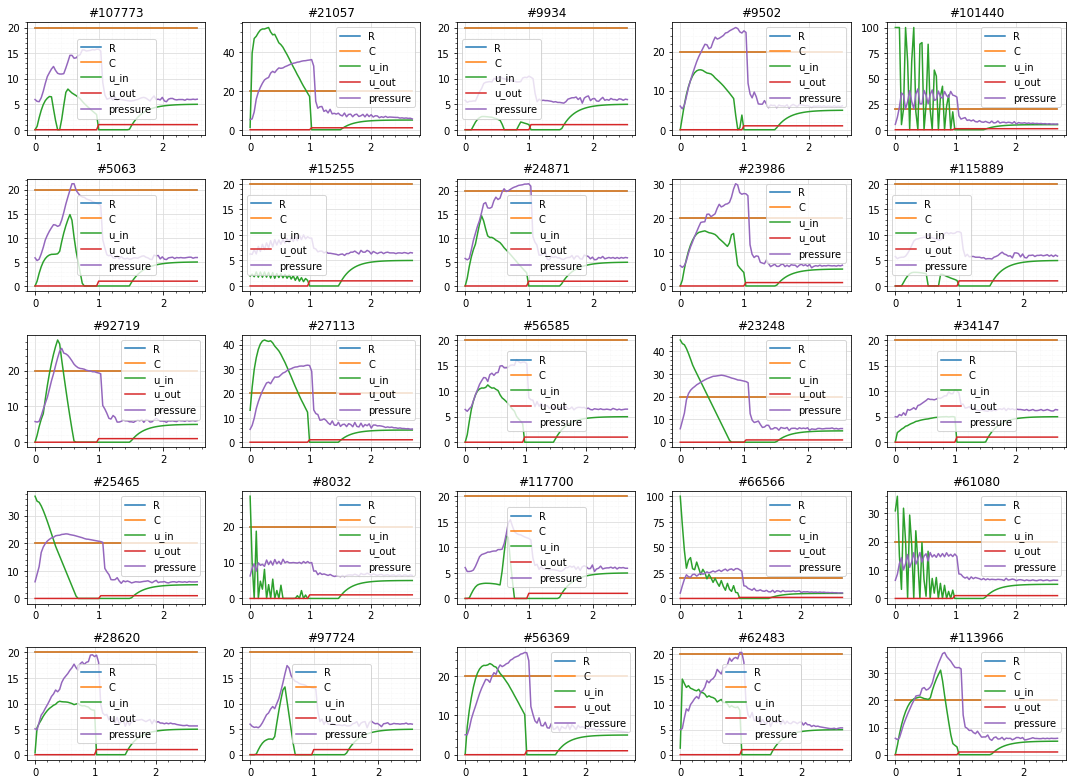

In [ ]:
plt.figure(figsize=(15, 11))

for i in range(0, 25):
    plt.subplot(5, 5, 1 + i)
    x = random.choice(breaths_r20c20)
    for y in features:
        plt.plot(train['time_step'][train['breath_id'] == x], train[y][train['breath_id'] == x], label=y)
    plt.title(f'#{x}')
    plt.legend()
    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
    plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    plt.minorticks_on()

plt.tight_layout()
plt.show()

In [ ]:
# voir en fonction de u_in
train['u_in'].unique()

array([ 0.08333401, 18.38304147, 22.50927777, ...,  1.55897786,
        1.27266322,  1.48273915])

In [ ]:
len(train['u_in'].unique())

4020300

In [ ]:
# beaucoup trop de valeurs différentes de u_in pour faire des catégories

In [ ]:
# idem avec les id des respi pour les poumons avec R20 et C10
breaths_r20c10 = train['breath_id'][(train['R'] == train['R'].unique()[0]) & (train['C'] == train['C'].unique()[2])].unique()
breaths_r20c10

array([    21,     23,     89, ..., 125737, 125742, 125743])

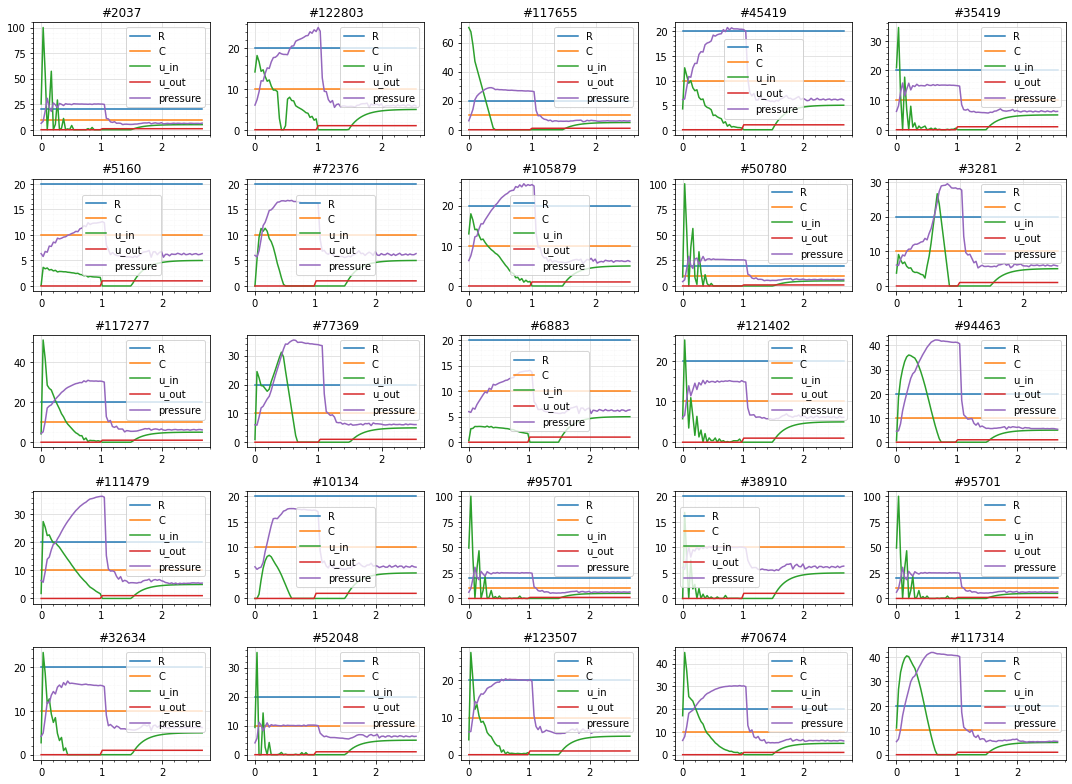

In [ ]:
plt.figure(figsize=(15, 11))

for i in range(0, 25):
    plt.subplot(5, 5, 1 + i)
    x = random.choice(breaths_r20c10)
    for y in features:
        plt.plot(train['time_step'][train['breath_id'] == x], train[y][train['breath_id'] == x], label=y)
    plt.title(f'#{x}')
    plt.legend()
    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
    plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    plt.minorticks_on()

plt.tight_layout()
plt.show()

In [ ]:
# idem avec les id des respi pour les poumons avec R50 et C10
breaths_r50c10 = train['breath_id'][(train['R'] == train['R'].unique()[1]) & (train['C'] == train['C'].unique()[2])].unique()
breaths_r50c10

array([    18,     25,     26, ..., 125732, 125736, 125749])

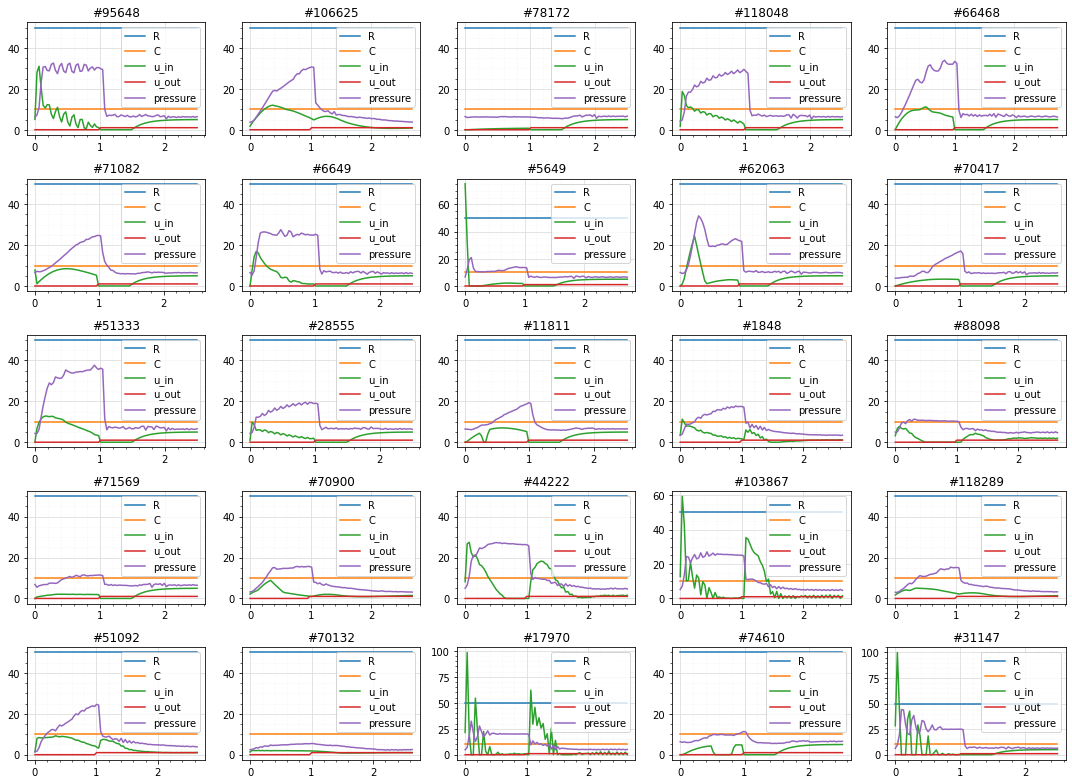

In [ ]:
plt.figure(figsize=(15, 11))

for i in range(0, 25):
    plt.subplot(5, 5, 1 + i)
    x = random.choice(breaths_r50c10)
    for y in features:
        plt.plot(train['time_step'][train['breath_id'] == x], train[y][train['breath_id'] == x], label=y)
    plt.title(f'#{x}')
    plt.legend()
    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
    plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    plt.minorticks_on()

plt.tight_layout()
plt.show()

In [ ]:
# idem avec les id des respi pour les poumons avec R50 et C10
breaths_r50c20 = train['breath_id'][(train['R'] == train['R'].unique()[1]) & (train['C'] == train['C'].unique()[1])].unique()
breaths_r50c20

array([     3,      7,     12, ..., 125659, 125693, 125723])

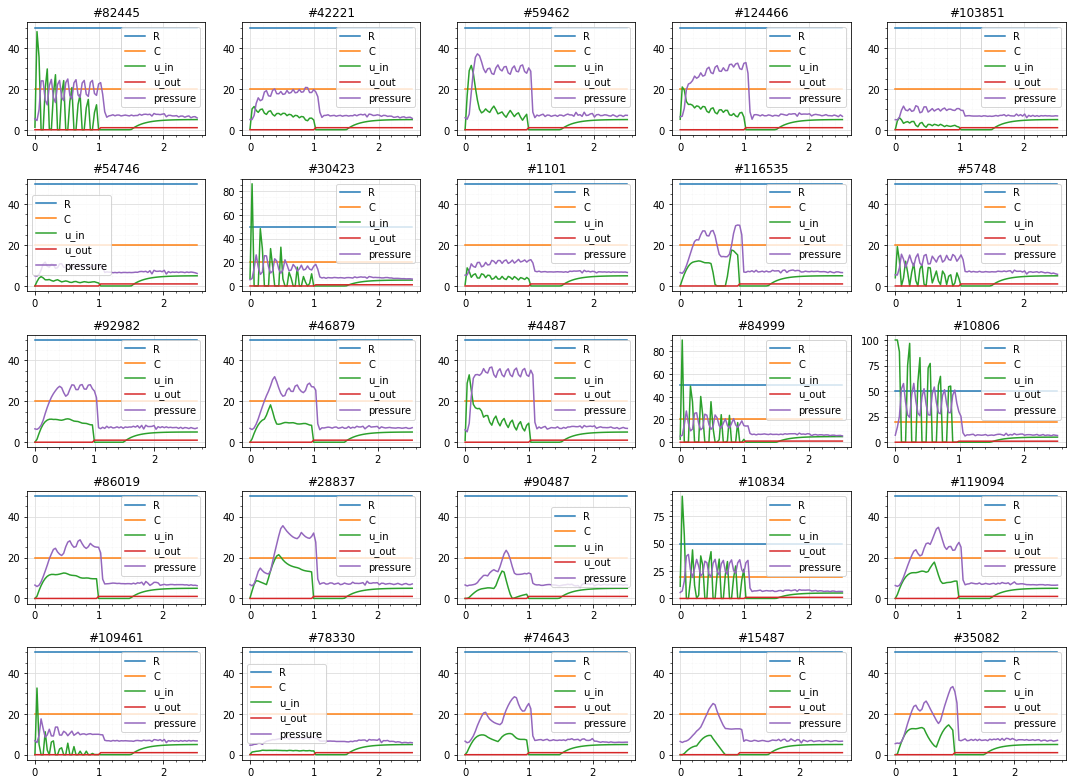

In [ ]:
plt.figure(figsize=(15, 11))

for i in range(0, 25):
    plt.subplot(5, 5, 1 + i)
    x = random.choice(breaths_r50c20)
    for y in features:
        plt.plot(train['time_step'][train['breath_id'] == x], train[y][train['breath_id'] == x], label=y)
    plt.title(f'#{x}')
    plt.legend()
    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
    plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    plt.minorticks_on()

plt.tight_layout()
plt.show()

In [ ]:
# idem avec les id des respi pour les poumons avec R50 et C50
breaths_r50c50 = train['breath_id'][(train['R'] == train['R'].unique()[1]) & (train['C'] == train['C'].unique()[0])].unique()
breaths_r50c50

array([     4,     10,     16, ..., 125738, 125740, 125745])

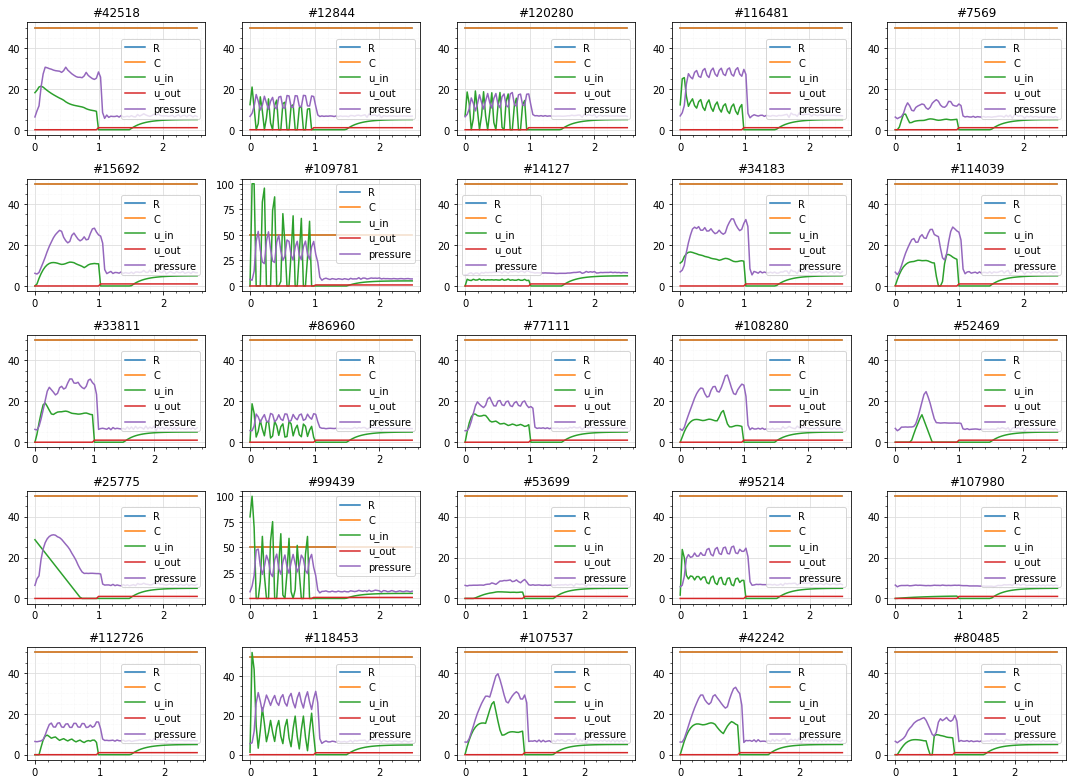

In [ ]:
plt.figure(figsize=(15, 11))

for i in range(0, 25):
    plt.subplot(5, 5, 1 + i)
    x = random.choice(breaths_r50c50)
    for y in features:
        plt.plot(train['time_step'][train['breath_id'] == x], train[y][train['breath_id'] == x], label=y)
    plt.title(f'#{x}')
    plt.legend()
    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
    plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    plt.minorticks_on()

plt.tight_layout()
plt.show()

In [ ]:
# idem avec les id des respi pour les poumons avec R5 et C50
breaths_r5c50 = train['breath_id'][(train['R'] == train['R'].unique()[2]) & (train['C'] == train['C'].unique()[0])].unique()
breaths_r5c50

array([     5,      6,     13, ..., 125694, 125727, 125735])

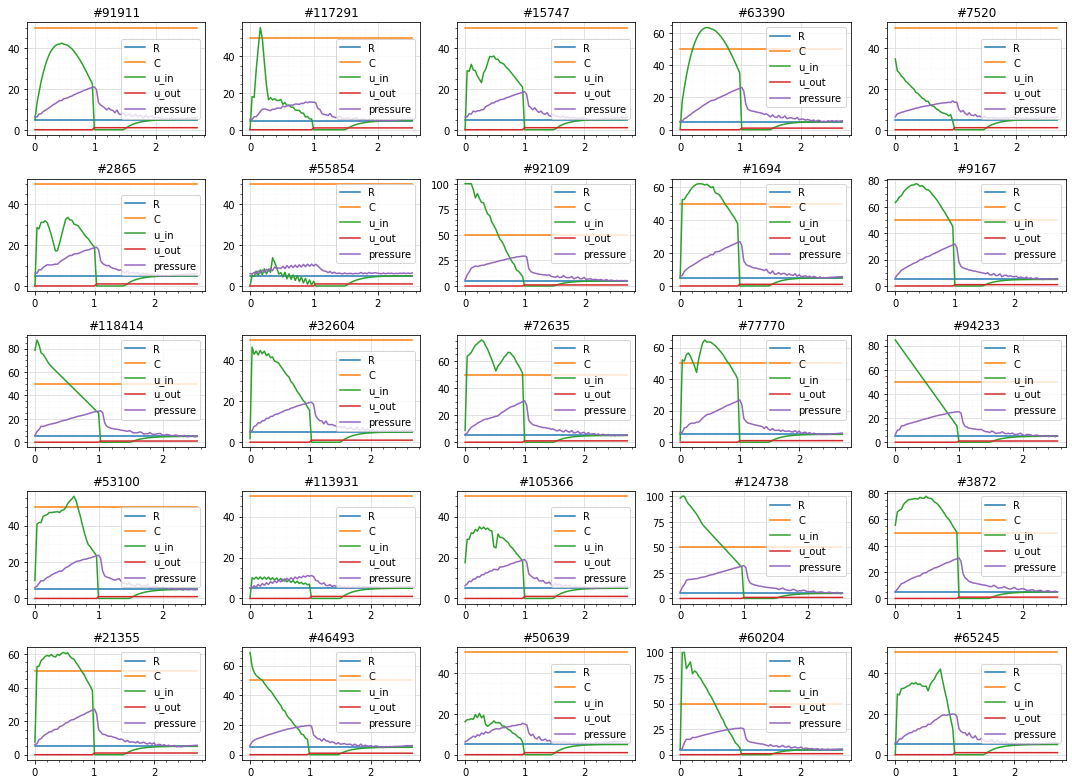

In [ ]:
plt.figure(figsize=(15, 11))

for i in range(0, 25):
    plt.subplot(5, 5, 1 + i)
    x = random.choice(breaths_r5c50)
    for y in features:
        plt.plot(train['time_step'][train['breath_id'] == x], train[y][train['breath_id'] == x], label=y)
    plt.title(f'#{x}')
    plt.legend()
    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
    plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    plt.minorticks_on()

plt.tight_layout()
plt.show()

In [ ]:
# idem avec les id des respi pour les poumons avec R5 et C20
breaths_r5c20 = train['breath_id'][(train['R'] == train['R'].unique()[2]) & (train['C'] == train['C'].unique()[1])].unique()
breaths_r5c20

array([    17,     68,     72, ..., 125725, 125730, 125739])

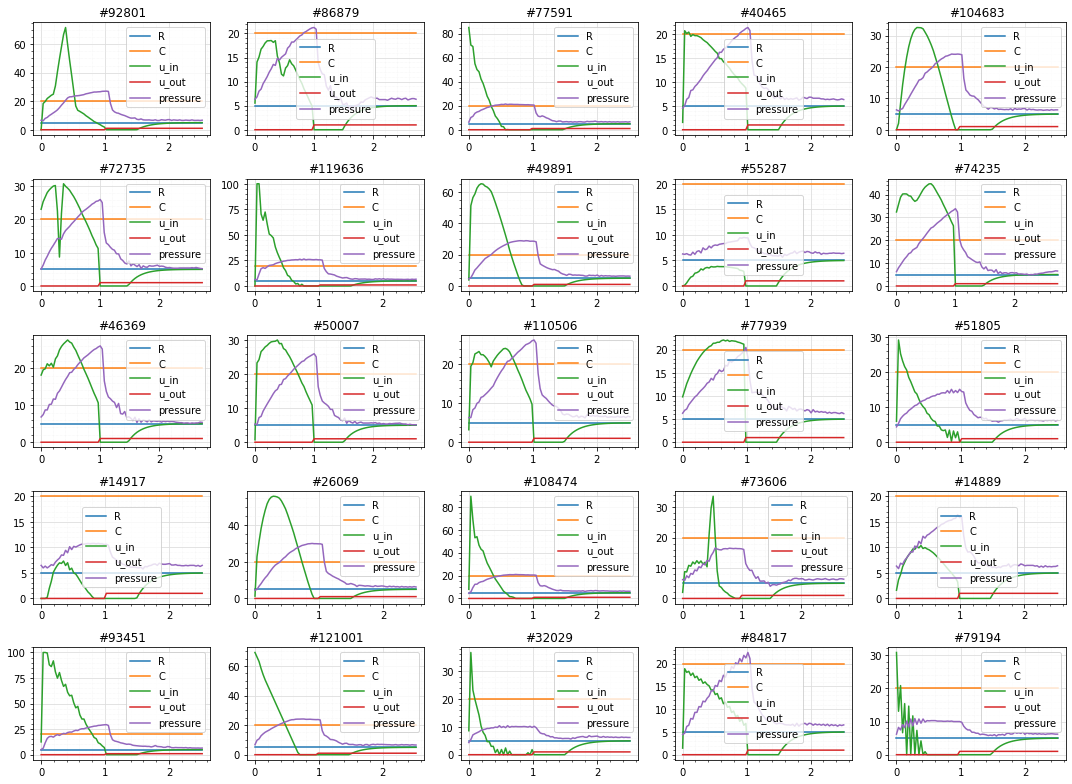

In [ ]:
plt.figure(figsize=(15, 11))

for i in range(0, 25):
    plt.subplot(5, 5, 1 + i)
    x = random.choice(breaths_r5c20)
    for y in features:
        plt.plot(train['time_step'][train['breath_id'] == x], train[y][train['breath_id'] == x], label=y)
    plt.title(f'#{x}')
    plt.legend()
    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
    plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    plt.minorticks_on()

plt.tight_layout()
plt.show()

In [ ]:
# idem avec les id des respi pour les poumons avec R5 et C10
breaths_r5c10 = train['breath_id'][(train['R'] == train['R'].unique()[2]) & (train['C'] == train['C'].unique()[2])].unique()
breaths_r5c10

array([    39,     43,     57, ..., 125690, 125720, 125733])

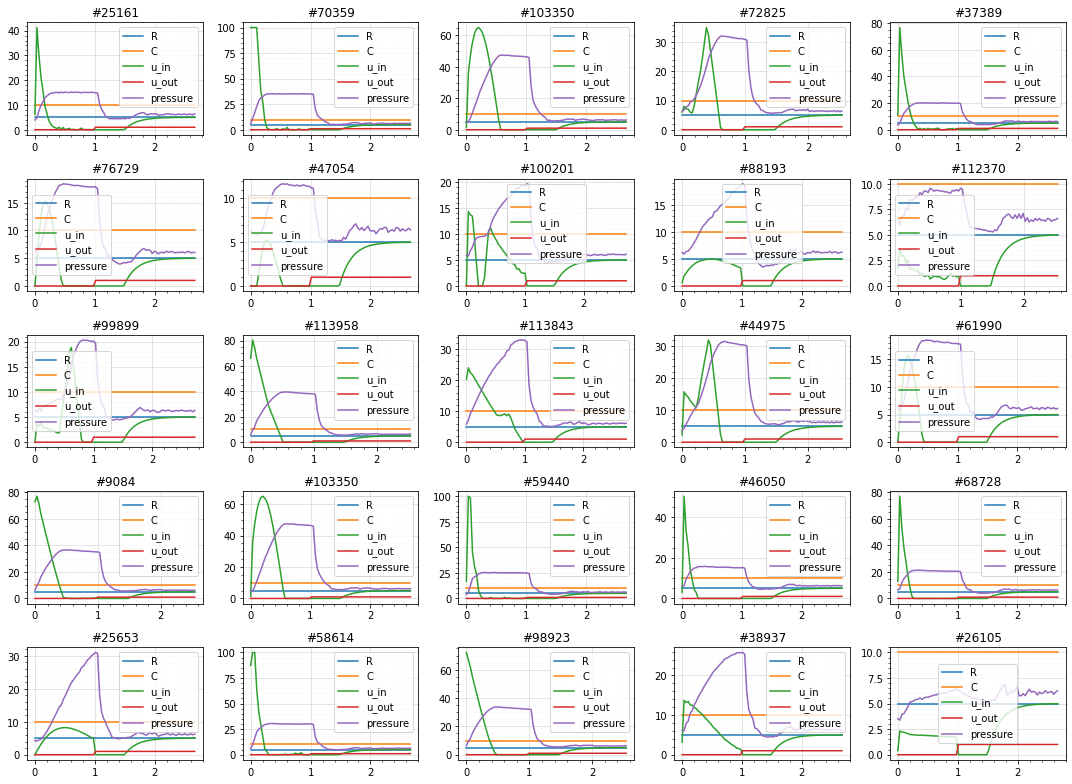

In [ ]:
plt.figure(figsize=(15, 11))

for i in range(0, 25):
    plt.subplot(5, 5, 1 + i)
    x = random.choice(breaths_r5c10)
    for y in features:
        plt.plot(train['time_step'][train['breath_id'] == x], train[y][train['breath_id'] == x], label=y)
    plt.title(f'#{x}')
    plt.legend()
    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
    plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    plt.minorticks_on()

plt.tight_layout()
plt.show()

## NaN ##

In [ ]:
# Valeurs manquantes
train.isna().sum()

id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

In [ ]:
# Pas de valeurs manquantes

## duplicates ##

In [ ]:
# Duplicates
train.duplicated().sum()

0

In [ ]:
# Pas de duplicats

## dataset test ## 

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Projet_schoolofdata/test.csv')

In [ ]:
test.shape

(4024000, 7)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024000 entries, 0 to 4023999
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
dtypes: float64(2), int64(5)
memory usage: 214.9 MB


In [ ]:
test.head()

id  breath_id  R   C  time_step       u_in  u_out
0   1          0  5  20   0.000000   0.000000      0
1   2          0  5  20   0.031904   7.515046      0
2   3          0  5  20   0.063827  14.651675      0
3   4          0  5  20   0.095751  21.230610      0
4   5          0  5  20   0.127644  26.320956      0

In [ ]:
test['breath_id']

0               0
1               0
2               0
3               0
4               0
            ...  
4023995    125748
4023996    125748
4023997    125748
4023998    125748
4023999    125748
Name: breath_id, Length: 4024000, dtype: int64

In [ ]:
test['breath_id'].nunique()

50300

In [ ]:
test['breath_id'].unique()

array([     0,      8,     11, ..., 125746, 125747, 125748])

In [ ]:
test.columns

Index(['id', 'breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out'], dtype='object')

In [ ]:
test.describe()

id     breath_id             R             C     time_step  \
count  4.024000e+06  4.024000e+06  4.024000e+06  4.024000e+06  4.024000e+06   
mean   2.012000e+06  6.292796e+04  2.710785e+01  2.607038e+01  1.307083e+00   
std    1.161629e+06  3.624924e+04  1.954281e+01  1.717103e+01  7.658902e-01   
min    1.000000e+00  0.000000e+00  5.000000e+00  1.000000e+01  0.000000e+00   
25%    1.006001e+06  3.153050e+04  5.000000e+00  1.000000e+01  6.428454e-01   
50%    2.012000e+06  6.305750e+04  2.000000e+01  2.000000e+01  1.308083e+00   
75%    3.018000e+06  9.433325e+04  5.000000e+01  5.000000e+01  1.965240e+00   
max    4.024000e+06  1.257480e+05  5.000000e+01  5.000000e+01  2.935203e+00   

               u_in         u_out  
count  4.024000e+06  4.024000e+06  
mean   7.338098e+00  6.203864e-01  
std    1.350955e+01  4.852908e-01  
min    0.000000e+00  0.000000e+00  
25%    4.096735e-01  0.000000e+00  
50%    4.377512e+00  1.000000e+00  
75%    4.983472e+00  1.000000e+00  
max    1.000000e+02  1.000000e+00

# machine learning #

## Scaling ##

In [ ]:
# sur train dataset uniquement pour commencer

In [ ]:
# definir X et y
X = train.drop(['id', 'breath_id', 'time_step', 'pressure'], axis=1)
y = train['pressure']

In [ ]:
# train test split sur train only
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4828800, 4), (1207200, 4), (4828800,), (1207200,))

In [ ]:
# rescaling rapide
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[:5]

array([[-1.12495708, -0.93746402, -0.18910749,  0.7821466 ],
       [ 1.17155537, -0.93746402, -0.54490433,  0.7821466 ],
       [ 1.17155537, -0.93746402, -0.1803296 ,  0.7821466 ],
       [-1.12495708, -0.93746402, -0.1918444 ,  0.7821466 ],
       [-0.35945293, -0.93746402, -0.28775824,  0.7821466 ]])

## Linear regression

In [ ]:
# linear regression
from sklearn.linear_model import LinearRegression 

In [ ]:
lr = LinearRegression()

In [ ]:
%%time
lr.fit(X_train, y_train)

CPU times: user 669 ms, sys: 1e+03 ms, total: 1.67 s
Wall time: 494 ms


LinearRegression()

In [ ]:
%%time
y_pred = lr.predict(X_test)

CPU times: user 15.6 ms, sys: 7.18 ms, total: 22.8 ms
Wall time: 7.71 ms


In [ ]:
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [ 0.14871936 -0.35740653  0.59906138 -4.73426959]
Intercept:  11.221283726162957


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'mse = {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'mae = {mae}')
maep = mean_absolute_percentage_error(y_test, y_pred)
print(f'maep = {maep}')
r2 = r2_score(y_test, y_pred)
print(f'r2 = {r2}')

mse = 40.55086037174128
mae = 3.973322420265965
maep = 0.5263285338562218
r2 = 0.38371376092173815


## randomized grid search pour linear regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy
import dill as pickle

In [ ]:
lr = LinearRegression()

param_dist = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
    'n_jobs':[1, 10, 100, 1000, 2000, 3000, 4000, 5000],
    'positive': [True, False]
    }

n_iter_search = 50 # n_iter is the number of hyperparameters settings that are tried
grid = RandomizedSearchCV(lr,
                         param_distributions=param_dist,
                         n_iter=n_iter_search,
                         verbose=1,
                         cv=5, 
                         n_jobs=1) # ne marchait pas avec n_jobs=-1

grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=50, n_jobs=1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 10, 100, 1000, 2000, 3000,
                                                   4000, 5000],
                                        'normalize': [True, False],
                                        'positive': [True, False]},
                   verbose=1)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([1.44619193, 1.11074634, 0.60004902, 0.60438805, 0.58673797,
        1.08287401, 1.14102845, 0.56564231, 0.63016305, 0.69727597,
        0.58860016, 0.62521744, 0.63429804, 0.59426742, 1.11381106,
        0.75427403, 0.62446918, 0.65022783, 1.27901201, 1.11450105,
        1.64064655, 0.92840915, 1.08087211, 1.09626021, 0.6031847 ,
        1.10656962, 0.63024831, 0.72250619, 0.72784395, 0.69190102,
        0.58354039, 0.56237955, 0.62734885, 1.13804684, 0.60078797,
        0.56492834, 0.62883525, 0.59343281, 0.72481661, 1.07140141,
        0.75676045, 1.13052197, 0.75489359, 0.6289906 , 1.07936802,
        0.68929777, 0.69389143, 1.13286295, 0.6033092 , 0.72885113]),
 'mean_score_time': array([0.03497138, 0.02986431, 0.02903323, 0.0282526 , 0.04506478,
        0.02539806, 0.02716813, 0.02857938, 0.04140673, 0.02715964,
        0.04033694, 0.04150295, 0.03324041, 0.02832952, 0.02635317,
        0.03297939, 0.03155875, 0.04006166, 0.03698463, 0.04708848,
        0.

In [ ]:
grid.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': 4000,
 'normalize': True,
 'positive': False}

In [ ]:
# utiliser les best params pour refaire un lr
lr = LinearRegression(copy_X = True, fit_intercept = True, n_jobs = 4000, normalize = True, positive = False)

In [ ]:
%%time
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


CPU times: user 857 ms, sys: 114 ms, total: 971 ms
Wall time: 952 ms


LinearRegression(n_jobs=4000, normalize=True)

In [ ]:
%%time
y_pred = lr.predict(X_test)

CPU times: user 14.2 ms, sys: 1.03 ms, total: 15.2 ms
Wall time: 18.3 ms


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'mse = {mse}')

40.55086037174128


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'mae = {mae}')

3.9733224202659665


## KNN regressor

In [ ]:
# KNN regressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
Knr = KNeighborsRegressor(n_neighbors=6)

In [ ]:
%%time
Knr.fit(X_train, y_train)

CPU times: user 2.39 s, sys: 230 ms, total: 2.62 s
Wall time: 2.18 s


KNeighborsRegressor(n_neighbors=6)

In [ ]:
%%time
y_pred = Knr.predict(X_test)

CPU times: user 9min 12s, sys: 867 ms, total: 9min 13s
Wall time: 9min 13s


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'mse = {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'mae = {mae}')
maep = mean_absolute_percentage_error(y_test, y_pred)
print(f'maep = {maep}')
r2 = r2_score(y_test, y_pred)
print(f'r2 = {r2}')

36.594599312552994
3.407826064660127
0.4050335780367751
0.4438404567952007


## SVR (echec - à retenter)

In [ ]:
# SVR
#from sklearn.svm import SVR

In [ ]:
#svr_linear = SVR(kernel="linear")

In [ ]:
#%%time
#svr_linear.fit(X_train, y_train) ## trop long

In [ ]:
#%%time
#y_pred = svr_linear.predict(X_test)

In [ ]:
#mse = mean_squared_error(y_test, y_pred)
#print(mse)
#mae = mean_absolute_error(y_test, y_pred)
#print(mae)
#maep = mean_absolute_percentage_error(y_test, y_pred)
#print(maep)
#r2 = r2_score(y_test, y_pred)
#print(r2)

In [ ]:
# test avec autre kernel

In [ ]:
#svr_rbf = SVR(kernel = "rbf")

In [ ]:
#%%time
#svr_rbf.fit(X_train, y_train)

In [ ]:
#%%time
#y_pred = svr_rbf.predict(X_test)

In [ ]:
#mse = mean_squared_error(y_test, y_pred)
#print(mse)
#mae = mean_absolute_error(y_test, y_pred)
#print(mae)
#maep = mean_absolute_percentage_error(y_test, y_pred)
#print(maep)
#r2 = r2_score(y_test, y_pred)
#print(r2)

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfc = RandomForestRegressor()

In [ ]:
%%time
rfc.fit(X_train, y_train)

In [ ]:
%%time
y_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'mse = {mse}')

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'mae = {mae}')

## RANSAC

In [ ]:
# RANSAC
from sklearn.linear_model import RANSACRegressor

In [ ]:
ransac = RANSACRegressor()

In [ ]:
%%time
ransac.fit(X_train, y_train)

CPU times: user 24.3 s, sys: 14.4 s, total: 38.7 s
Wall time: 5.29 s


RANSACRegressor()

In [ ]:
%%time
y_pred = ransac.predict(X_test)

CPU times: user 9.49 ms, sys: 9.19 ms, total: 18.7 ms
Wall time: 18.7 ms


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'mse = {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'mae = {mae}')
maep = mean_absolute_percentage_error(y_test, y_pred)
print(f'maep = {maep}')
r2 = r2_score(y_test, y_pred)
print(f'r2 = {r2}')

78.20373753025005
4.786061301974359
0.35052636600597964
-0.18852933926816617


# deep learning #

## MLP

In [ ]:
# MLP
import tensorflow as tf

In [ ]:
# Define a function
def model(input_dim):
    # We create a so called Sequential model
    model = tf.keras.models.Sequential()
    
    # Add the first "Dense" layer of 3 units, and give the input dimension
    model.add(tf.keras.layers.Dense(100, input_dim=input_dim, activation='linear'))
    
    # Add the second "Dense" layer of 3 units
    # This time the input dimension is not needed anymore: it is known from the previous layer
    model.add(tf.keras.layers.Dense(100, activation='linear'))
    model.add(tf.keras.layers.Dense(100, activation='linear'))

    # Add finally the output layer with one unit: the predicted result
    model.add(tf.keras.layers.Dense(1, activation='linear'))

    # return the created model
    return model 

In [ ]:
my_model = model(input_dim=4)
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               500       
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20,801
Trainable params: 20,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(monitor='val_loss', patience=10)]

In [ ]:
# Compile the model with mean squared error (for regression)
my_model.compile(optimizer='adam', loss='mse')

In [ ]:
%%time
# Now fit the model on 100 epoches with a batch size of 64
my_model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=200, batch_size=128, callbacks=callbacks)

Epoch 1/200
37725/37725 [==============================] - 79s 2ms/step - loss: 40.8438 - val_loss: 40.7211
Epoch 2/200
37725/37725 [==============================] - 77s 2ms/step - loss: 40.6253 - val_loss: 40.5704
Epoch 3/200
37725/37725 [==============================] - 77s 2ms/step - loss: 40.5994 - val_loss: 40.5692
Epoch 4/200
37725/37725 [==============================] - 77s 2ms/step - loss: 40.5916 - val_loss: 40.5547
Epoch 5/200
37725/37725 [==============================] - 77s 2ms/step - loss: 40.5851 - val_loss: 40.6274
Epoch 6/200
37725/37725 [==============================] - 77s 2ms/step - loss: 40.5774 - val_loss: 40.5550
Epoch 7/200
37725/37725 [==============================] - 77s 2ms/step - loss: 40.5747 - val_loss: 40.5864
Epoch 8/200
37725/37725 [==============================] - 77s 2ms/step - loss: 40.5678 - val_loss: 40.5536
Epoch 9/200
37725/37725 [==============================] - 77s 2ms/step - loss: 40.5665 - val_loss: 40.5763
Epoch 10/200
37725/37725 [==

KeyboardInterrupt: ignored

In [ ]:
%%time
my_model.predict(X_test)

CPU times: user 43.8 s, sys: 4.14 s, total: 48 s
Wall time: 38.4 s


array([[ 7.5266857],
       [16.86991  ],
       [ 7.4208093],
       ...,
       [ 6.8034143],
       [ 7.274518 ],
       [ 7.749216 ]], dtype=float32)

In [ ]:
loss, mean_absolute_error, mean_squared_error = my_model.evaluate(X_test, y_test, verbose=0)
print('loss is:', loss)
print('mae is:', mean_absolute_error)
print('mse is:', mean_squared_error)

loss is: 40.57411193847656
mae is: 40.57411193847656
mse is: 3.9655745029449463


## LSTM & lookback

In [ ]:
# test en prenant RNN advanced et gestion time series avec lookback

# TODO: Compute X and y en prenant lookback
def processData(data, past):
    X = []                                   # on cree une matrice X
    for i in range(len(data)-past-1):             # on itere sur les dates 
        X.append(data.iloc[i:i+past].values)           # pas besoin de mettre l'indice des colonnes, on prend tout
    return np.array(X)

lookback = 80                                     # pour regarder past respiration - 1 respi = 80 données

y = train['pressure'][lookback+1:]
X = processData(train.drop(['id', 'breath_id', 'time_step', 'pressure'], axis=1), lookback)
X.shape, y.shape

((99919, 80, 4), (99919,))

In [ ]:
y

81        7.524743
82        9.282297
83       10.336829
84        9.844714
85       11.180455
           ...    
99995     7.102930
99996     6.329607
99997     6.821722
99998     6.962326
99999     6.399909
Name: pressure, Length: 99919, dtype: float64

In [ ]:
# TODO: split (on shuffle pas pour garder information temporelle)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False, stratify=None)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((79935, 80, 4), (19984, 80, 4), (79935,), (19984,))

In [ ]:
# scale data
# impossible d'utiliser standardscaler ici car 3 dim
X_train = (X_train - np.mean(X_train, axis=0))/np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0))/np.std(X_test, axis=0)

In [ ]:
# ici architecture many to one : plusieurs séquences en entrée et on veut prédire une seule valeur

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

# Define the model

def my_RNN():

    model = Sequential()

    # We add two layers of RNN 
    model.add(LSTM(units=16, return_sequences=True, input_shape=(lookback, 4), activation='sigmoid'))
    model.add(LSTM(units=16, return_sequences=False, activation='sigmoid'))
    
    # Finally we add a sigmoid
    model.add(Dense(units=1, activation='linear'))

    return model

In [ ]:
model = my_RNN()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80, 16)            1344      
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 3,473
Trainable params: 3,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='mse')

In [ ]:
# Train the model
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=200, batch_size=128)

Epoch 1/200
625/625 [==============================] - 135s 209ms/step - loss: 114.1918 - val_loss: 82.0213
Epoch 2/200
625/625 [==============================] - 129s 206ms/step - loss: 72.5212 - val_loss: 71.5071
Epoch 3/200
625/625 [==============================] - 129s 206ms/step - loss: 63.8913 - val_loss: 48.9440
Epoch 4/200
625/625 [==============================] - 128s 205ms/step - loss: 35.0289 - val_loss: 27.7134
Epoch 5/200
625/625 [==============================] - 128s 205ms/step - loss: 18.9350 - val_loss: 16.4276
Epoch 6/200
625/625 [==============================] - 128s 205ms/step - loss: 11.5603 - val_loss: 11.5510
Epoch 7/200
625/625 [==============================] - 128s 205ms/step - loss: 8.1769 - val_loss: 8.9926
Epoch 8/200
625/625 [==============================] - 129s 206ms/step - loss: 6.4749 - val_loss: 7.7973
Epoch 9/200
625/625 [==============================] - 129s 206ms/step - loss: 5.5452 - val_loss: 7.0506
Epoch 10/200
625/625 [====================

In [ ]:
y_pred = model.predict(X_test)

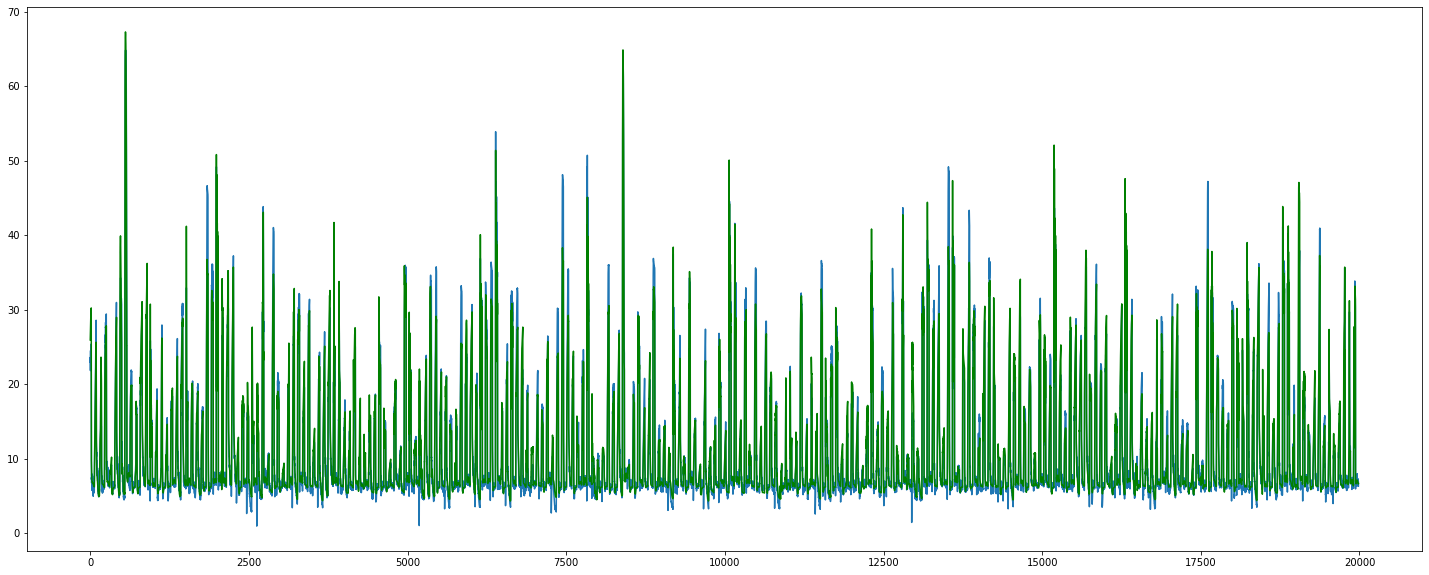

In [ ]:
# TODO: Plot the results
plt.figure(figsize=(25,10))
plt.plot(y_test.values) 
plt.plot(y_pred.flatten(), color='green')
plt.show()

In [ ]:
loss = model.evaluate(X_test, y_test, verbose=0)
print('loss is:', loss)

loss is: 3.440037488937378


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'mse = {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'mae = {mae}')
r2 = r2_score(y_test, y_pred)
print(f'r2 = {r2}')

3.4400384788031353


## Simple RNN

In [ ]:
# réduire dataset car pas assez de ram pour preprocess dataset entier
# impossible de sample aléatoirement car "casserait" la série temporelle
# dfreduit = train.sample(2000000) -> impossible ici car prendrait données aléatoirement et casserait les respirations
dfreduit = train[:2000000]

In [ ]:
dfreduit.head()

id  breath_id   R   C  time_step       u_in  u_out   pressure
0   1          1  20  50   0.000000   0.083334      0   5.837492
1   2          1  20  50   0.033652  18.383041      0   5.907794
2   3          1  20  50   0.067514  22.509278      0   7.876254
3   4          1  20  50   0.101542  22.808822      0  11.742872
4   5          1  20  50   0.135756  25.355850      0  12.234987

In [ ]:
dfreduit.tail()

id  breath_id   R   C  time_step      u_in  u_out  pressure
2999995  2999996      62376  20  50   2.554423  4.977554      1  6.681117
2999996  2999997      62376  20  50   2.588437  4.981065      1  6.329607
2999997  2999998      62376  20  50   2.622453  4.984026      1  6.399909
2999998  2999999      62376  20  50   2.656479  4.986525      1  6.540513
2999999  3000000      62376  20  50   2.690499  4.988633      1  6.259305

In [ ]:
dfreduit.shape

(2000000, 8)

In [ ]:
y = dfreduit['pressure']
X = dfreduit.drop(['id', 'breath_id', 'time_step', 'pressure'], axis=1)
X.shape, y.shape

((2000000, 4), (2000000,))

In [ ]:
# TODO: Prepare and split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False, stratify=None)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600000, 4), (400000, 4), (1600000,), (400000,))

In [ ]:
# toujours splitter d'abord et scaler ensuite
# impossible d'utiliser standardscaler ici car 3 dim
X_train = (X_train - np.mean(X_train, axis=0))/np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0))/np.std(X_test, axis=0)

In [ ]:
print(np.median([len(i) for i in X_train]))

2.5


In [ ]:
from tensorflow.keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train,
                                 value=0,
                                 padding='post', # to add zeros at the end
                                 maxlen=9) # the length we want

X_test = sequence.pad_sequences(X_test,
                                value=0,
                                padding='post', # to add zeros at the end
                                maxlen=9) # the length we want

ValueError: ignored

In [ ]:
from sklearn import preprocessing 
import keras
from keras.layers import Dense 
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

In [ ]:
! pip install keras-tuner --upgrade

     |████████████████████████████████| 133 kB 8.3 MB/s 


In [ ]:
import tensorflow as tf
import keras_tuner as kt

In [ ]:
# model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import layers
from keras_tuner import HyperModel


def my_RNN():

    model = Sequential()
    # pas besoin de couche d'embedding ici vu qu'on a déjà la bonne forme, mais donner la shape dans première couche rnn
    # We add two layers of RNN 
    model.add(SimpleRNN(units=16, return_sequences=True, input_shape=(lookback, 4), activation='sigmoid'))
    model.add(SimpleRNN(units=16, return_sequences=False, activation='sigmoid'))
    
    # Finally we add a sigmoid
    model.add(Dense(units=1, activation='linear'))

    return model

In [ ]:
model = my_RNN()

In [ ]:
model.compile(optimizer='adam',
              loss='mse')
# ici on def pas de metrics car mse assez implicite mais on aurait pu mettre mae en metrics

In [ ]:
# Define the parameters to try out
params = {'activation': ["relu", "tanh"],
          'batch_size': [16, 32, 64], 
          'epochs': [50, 100],
          'learning_rate': [0.01, 0.001, 0.0001]}

In [ ]:
random_search = RandomizedSearchCV(model,
                                   param_distributions = params,
                                   objective='mse',
                                   cv = KFold(10))

TypeError: ignored

In [ ]:
random_search_results = random_search.fit(X_train, y_train)

TypeError: ignored

In [ ]:
print("Best Score: ",
      random_search_results.best_score_,
      "and Best Params: ",
      random_search_results.best_params_)

simple RNN

In [ ]:
model = my_RNN()

NameError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 80, 16)            336       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                528       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import datetime, os

In [ ]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
callbacks = [EarlyStopping(monitor='val_loss', patience=5), 
             TensorBoard(logdir, histogram_freq=1)]

In [ ]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, callbacks=callbacks)

Epoch 1/20
12500/12500 [==============================] - 1178s 94ms/step - loss: 23.0086 - val_loss: 4.6475
Epoch 2/20
12500/12500 [==============================] - 1164s 93ms/step - loss: 3.9577 - val_loss: 3.2807
Epoch 3/20
12500/12500 [==============================] - 1164s 93ms/step - loss: 3.1496 - val_loss: 2.9856
Epoch 4/20
12500/12500 [==============================] - 1165s 93ms/step - loss: 2.8047 - val_loss: 2.5497
Epoch 5/20
12500/12500 [==============================] - 1163s 93ms/step - loss: 2.6426 - val_loss: 2.5718
Epoch 6/20
12500/12500 [==============================] - 1160s 93ms/step - loss: 2.5524 - val_loss: 2.3429
Epoch 7/20
12500/12500 [==============================] - 1161s 93ms/step - loss: 2.4835 - val_loss: 2.2949
Epoch 8/20
12500/12500 [==============================] - 1161s 93ms/step - loss: 2.4232 - val_loss: 2.4974
Epoch 9/20
12500/12500 [==============================] - 1164s 93ms/step - loss: 2.3843 - val_loss: 2.4284
Epoch 10/20
12500/12500 [==

In [ ]:
# visualiser résultats sur tensorboard

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs

In [ ]:
# racine carrée de la mse finale
np.sqrt(2.1926)

1.4807430567117308

In [ ]:
model.predict(X_test)

NameError: ignored

In [ ]:
# TODO: Plot the results
plt.plot(y_test) # = ce qu'on aurait voulu prédire
plt.plot(model.predict(X_test)) # ce qu'on a prédit

In [ ]:
# pour prédire sur le set test et vérifier si le modèle se trompe
#y_pred = model.predict(X_test) #avec le vrai X_test
#plt.figure(figsize=(16,16))
#for i in range(81):  
#    plt.subplot(9,9, 1 + i)
#    plt.imshow(X_test[i].reshape(28,28), cmap=plt.get_cmap('gray_r'))
#    plt.title(f"t: {y_test[i]} p: {np.argmax(y_pred[i])}" )
#    plt.axis('off')
#plt.show()